In [251]:
import pandas as pd

In [252]:
df = pd.read_csv('/Users/azulmakk/Universidad/Datasets/Predictiva/dataset.csv')

In [253]:
print(df.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [254]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['track_id'], axis=1)

In [255]:
import pandas as pd

def agregar_estadisticas_por_grupo(df, columna, columna_grupo):

    max_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('max')
    min_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('min')
    median_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('median')
    mean_columna_por_grupo = df.groupby(columna_grupo)[columna].transform('mean')

    df[columna + '_max_X_' + columna_grupo] = max_columna_por_grupo
    df[columna + '_min_X_' + columna_grupo] = min_columna_por_grupo
    df[columna + '_median_X_' + columna_grupo] = median_columna_por_grupo
    df[columna + '_mean_' + columna_grupo] = mean_columna_por_grupo

    return df


In [256]:
df = agregar_estadisticas_por_grupo(df, 'energy', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'danceability', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'liveness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'speechiness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'acousticness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'instrumentalness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'loudness', 'track_genre')
df = agregar_estadisticas_por_grupo(df, 'instrumentalness', 'duration_ms')

In [257]:
df['max_duration_by_artist'] = df.groupby('artists')['duration_ms'].transform('max')
df['min_duration_by_artist'] = df.groupby('artists')['duration_ms'].transform('min')
df['median_duration_by_artist'] = df.groupby('artists')['duration_ms'].transform('median')
mean_duration_all_artists = df['duration_ms'].mean()
df['max_duration_by_artist'].fillna(mean_duration_all_artists, inplace=True)
df['min_duration_by_artist'].fillna(mean_duration_all_artists, inplace=True)
df['median_duration_by_artist'].fillna(mean_duration_all_artists, inplace=True)

In [258]:
columns_with_nas = df.columns[df.isna().any()].tolist()

if columns_with_nas:
    print("Columns with missing values:", columns_with_nas)
else:
    print("No missing values found in any column.")

# Las columnas con valores nulos son: ['artists', 'album_name', 'track_name']

Columns with missing values: ['artists', 'album_name', 'track_name']


In [259]:
def frequency_encoding(df, column):
    freq = df[column].value_counts(normalize=True).to_dict()
    df[column + '_freq_encoded'] = df[column].map(freq)
    return df

In [260]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(data):
    le = LabelEncoder()
    encoded_data = le.fit_transform(data)
    return encoded_data

In [261]:
count_dict = df.groupby('track_genre')['explicit'].value_counts().unstack().fillna(0).astype(int).to_dict()

df['explicit_x_genre'] = df['track_genre'].map(count_dict[True])

print(df[['track_genre', 'explicit', 'explicit_x_genre']])

        track_genre  explicit  explicit_x_genre
0          acoustic     False                52
1          acoustic     False                52
2          acoustic     False                52
3          acoustic     False                52
4          acoustic     False                52
...             ...       ...               ...
113995  world-music     False                 0
113996  world-music     False                 0
113997  world-music     False                 0
113998  world-music     False                 0
113999  world-music     False                 0

[114000 rows x 3 columns]


In [262]:
df['explicit'] = df['explicit'].astype(int)

In [263]:
df['promedio_explicit_por_artista'] = df.groupby('artists')['explicit'].transform('mean')
mean_explicit_all_artists = df['explicit'].mean()
df['promedio_explicit_por_artista'].fillna(mean_explicit_all_artists, inplace=True)

df['promedio_explicit_por_genero'] = df.groupby('track_genre')['explicit'].transform('mean')
mean_explicit_all_artists = df['explicit'].mean()
df['promedio_explicit_por_genero'].fillna(mean_explicit_all_artists, inplace=True)

In [264]:
df['track_genre_encoded'] = label_encoder(df['track_genre'])

print(df[['track_genre', 'track_genre_encoded']])
df = df.drop(['track_genre'], axis=1)

        track_genre  track_genre_encoded
0          acoustic                    0
1          acoustic                    0
2          acoustic                    0
3          acoustic                    0
4          acoustic                    0
...             ...                  ...
113995  world-music                  113
113996  world-music                  113
113997  world-music                  113
113998  world-music                  113
113999  world-music                  113

[114000 rows x 2 columns]


In [265]:
df['artists_encoded'] = label_encoder(df['artists'])

print(df[['artists', 'artists_encoded']])
df = df.drop(['artists'], axis=1)

                       artists  artists_encoded
0                  Gen Hoshino            10357
1                 Ben Woodward             3287
2       Ingrid Michaelson;ZAYN            12397
3                 Kina Grannis            14839
4             Chord Overstreet             5255
...                        ...              ...
113995           Rainy Lullaby            22486
113996           Rainy Lullaby            22486
113997           Cesária Evora             4952
113998        Michael W. Smith            18534
113999           Cesária Evora             4952

[114000 rows x 2 columns]


In [266]:
df.drop(['track_name', 'album_name'], axis=1, inplace=True)

In [267]:
# Assuming df is your DataFrame
columns_with_nan = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [268]:
object_columns = df.select_dtypes(include=['object']).columns

# Mostrar las columnas seleccionadas
print(object_columns)

Index([], dtype='object')


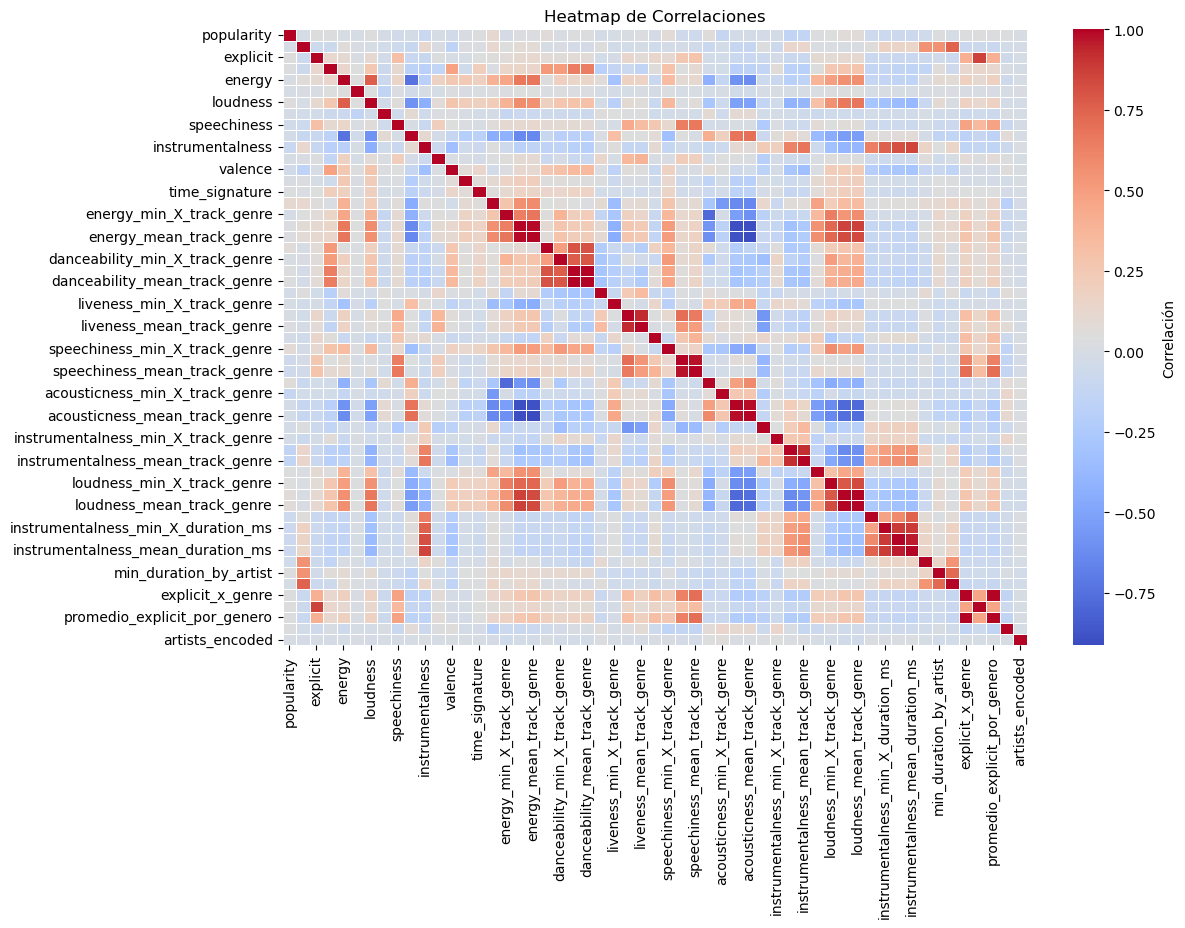

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlación'})
plt.title('Heatmap de Correlaciones')
plt.show()

In [270]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# X = df.drop('explicit', axis=1)
# y = df['explicit']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# extra = ExtraTreesClassifier(max_depth=40, min_samples_split=13, n_estimators=2000, bootstrap=True)
# extra.fit(X_train, y_train)

# y_pred = extra.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# classification_report_result = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Classification Report:\n', classification_report_result)  

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming df is your DataFrame with the 'artists' and 'explicit' columns
X = df.drop('explicit', axis=1)
y = df['explicit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# X = df.drop('explicit', axis=1)
# y = df['explicit']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# classifiers = {
#     'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(n_estimators=1000, random_state=42),
#     'Support Vector Machine': SVC(kernel='linear', random_state=42),
#     'Logistic Regression': LogisticRegression(random_state=42)
# }

# for clf_name, clf in classifiers.items():
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     classification_report_result = classification_report(y_test, y_pred)

#     print(f'\nClassifier: {clf_name}')
#     print(f'Accuracy: {accuracy}')
#     print('Classification Report:\n', classification_report_result)